In [324]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

In [325]:
C = 200 
W = 250 
K = 1000 * 1000
gamma = 2.8
R = 300 
lbda = 0.01 
SINRmin = 0.1
p = 0.01
Smin = 30
Smax = 100

In [326]:
def N(x):
    return int(np.ceil(C / (W * np.log2(1 + K/(np.linalg.norm(x) ** gamma)))))

def Nmax():
    return int(np.ceil(C / (W * np.log2(1 + SINRmin))))

def mean_rv_zeta(k):    
    
    
    upper_bound = K / (2**(C/(k * W)) - 1)
    lower_bound = K / (2**(C/((k-1) * W)) - 1) if k > 1 else 0

    result =  p * lbda * np.pi * np.abs(upper_bound**(2/gamma) - lower_bound**(2/gamma))
    return result

def size_vectors():
    return K

def generate_zeta(i):
    
    mean = mean_rv_zeta(i)
    size = size_vectors()
    result = np.random.poisson(lam=mean, size=(size, ))

    return result

def generate_zetas():
    result = []
    N_max = Nmax()
    for i in range(1, N_max + 1):
        size = size_vectors()
        mean = mean_rv_zeta(i)
        temp = np.random.poisson(lam=mean, size=(size, ))
        result.append(temp)
    
    return np.array(result)

def k_generate_zetas():
    result = generate_zetas()
    
    N_max = Nmax()
    
    ks = np.arange(1, N_max + 1, 1)

    for i in range(result.shape[1]):
        result[:, i] *= ks 
    

    return result

def F():
    result = k_generate_zetas()
    return np.sum(result, axis = 0)

def f(x, nu):
    return x*(1 - np.log(x)) - 1 + 4 * np.log(10) / nu

In [327]:
res = k_generate_zetas()

In [328]:
res

array([[ 8,  5,  9, ...,  4,  6,  5],
       [ 8, 10, 10, ..., 14, 10, 14],
       [21, 30, 12, ...,  9, 24, 12],
       [20, 28, 20, ..., 32, 20, 36],
       [25, 30,  5, ..., 30, 60, 20],
       [ 6, 12, 12, ..., 18, 30, 18]])

In [329]:
F()

array([ 65, 116, 103, ...,  84, 105,  57])

In [330]:
def draw_circle():
    theta = np.linspace(0, 2 * np.pi, 100)
    plt.plot(R * np.cos(theta), R * np.sin(theta), color = 'red')
    plt.grid()    
    plt.show()

In [358]:
def generate_points_circle(nmax):
    
    r = np.random.uniform(0, 1, size=(nmax, 1)) * R
    theta = np.random.uniform(0, 2 * np.pi, size=(nmax, 1))
    
    x = r * np.cos(theta) 
    y = r * np.sin(theta) 

    return np.hstack((x, y))

def simulate_active_users(nmax):
    points = generate_points_circle(nmax)
    keep = np.random.uniform(0, 1, size=(nmax,)) <= p
    return points[keep]

In [359]:
X = generate_points_circle(1_000)
Y = simulate_active_users(1000)

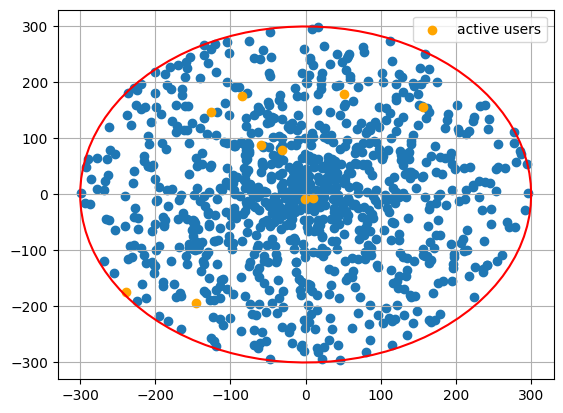

In [360]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(Y[:, 0], Y[:, 1], color = 'orange', label='active users')
plt.legend()
draw_circle()
plt.show()

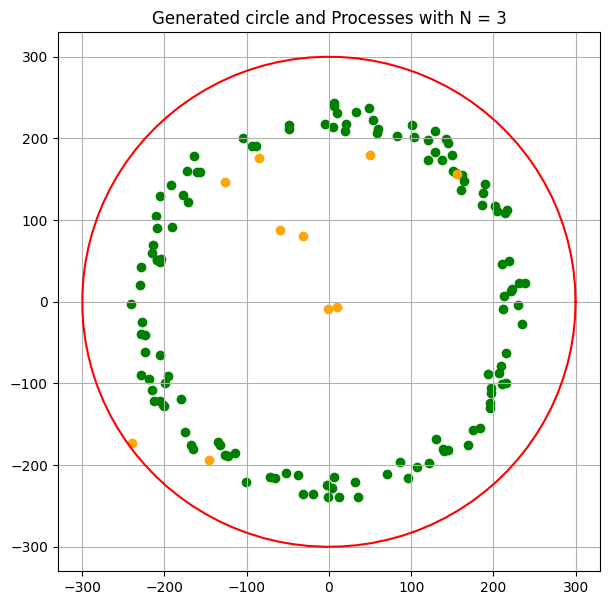

In [361]:
N_3 = []
for i in range(X.shape[0]):
    number_points = N(X[i])
    if number_points == 3:
        N_3.append(X[i])

N_3 = np.array(N_3)

plt.figure(figsize=(7, 7))
plt.title("Generated circle and Processes with N = 3")
plt.scatter(N_3[:, 0], N_3[:, 1], color='green')
plt.scatter(Y[:, 0], Y[:, 1], color = 'orange')
draw_circle()

In [362]:
test_rvs = []

for _ in range(1000):
    temp = generate_points_circle(10)
    filtered = [p for p in temp if N(p) == 3]
    test_rvs.append(len(filtered))

reference_rvs = generate_zeta(3)

mean_test = np.mean(test_rvs)
std_test = np.std(test_rvs)

In [363]:
print(reference_rvs, test_rvs)

[4 8 4 ... 5 7 3] [2, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 1, 3, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1, 1, 1, 2, 1, 5, 3, 2, 3, 0, 0, 0, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 1, 2, 2, 1, 4, 3, 1, 2, 3, 3, 0, 1, 0, 2, 0, 1, 1, 1, 1, 3, 0, 1, 2, 1, 3, 1, 0, 1, 1, 0, 0, 0, 2, 0, 2, 1, 3, 2, 1, 1, 0, 4, 2, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 1, 1, 2, 3, 5, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1, 0, 1, 4, 0, 2, 2, 1, 0, 3, 0, 1, 1, 1, 3, 1, 1, 4, 2, 0, 2, 1, 2, 1, 1, 0, 4, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 3, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 3, 0, 0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 3, 0, 1, 2, 0, 1, 0, 0, 4, 0, 1, 0, 1, 1, 1, 4, 0, 0, 1, 1, 1, 1, 2, 3, 2, 1, 0, 1, 0, 0, 2, 3, 2, 0, 3, 3, 1, 3, 1, 1, 1, 2, 2, 2, 1, 0, 1, 0, 2, 2, 1, 1, 4, 0, 3, 1, 0, 2, 1, 2, 3, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 3, 0, 2, 2, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 1, 3, 1, 1, 2, 3, 0, 3, 1, 1, 1, 1, 0, 3, 1, 3, 2, 1, 5, 0, 1, 3, 2, 

In [364]:
D, pvalue = sp.stats.kstest(test_rvs, reference_rvs)
print(D, pvalue)

0.770421 0.0


In [338]:
N_max = Nmax()
print(N_max)

6


[7.51292097 6.18976995 5.24130492 4.71923505 4.37078461 4.11434742]


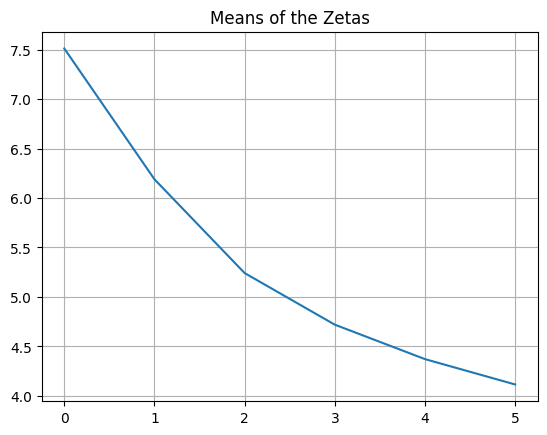

In [339]:
means_zetas = np.zeros(N_max)
for i in range(1, N_max  + 1):
    mean = mean_rv_zeta(i)
    means_zetas[i - 1] = mean

print(means_zetas)

plt.plot(means_zetas)
plt.title("Means of the Zetas")
plt.grid()
plt.show()

In [340]:
K_s = np.zeros(N_max)
for i in range(1, N_max + 1):
    nu = mean_rv_zeta(i)
    K_optim = sp.optimize.fsolve(f, K, args=(nu))
    K_s[i - 1] = K_optim[0] * nu

K_s = np.ceil(K_s)
Kmax = np.max(K_s).astype(int)
# Here we get the Ks necessary to represent a random variable following poisson of parameter nu
print(K_s)

[23. 20. 18. 17. 17. 16.]


In [341]:
distribution_zeta = np.zeros(shape=(N_max, Kmax))
for i in range(1, N_max + 1):
    nu = mean_rv_zeta(i)
    for j in range(Kmax):
        distribution_zeta[i - 1, j] = np.exp(-nu) * (nu ** j) / sp.special.factorial(j)

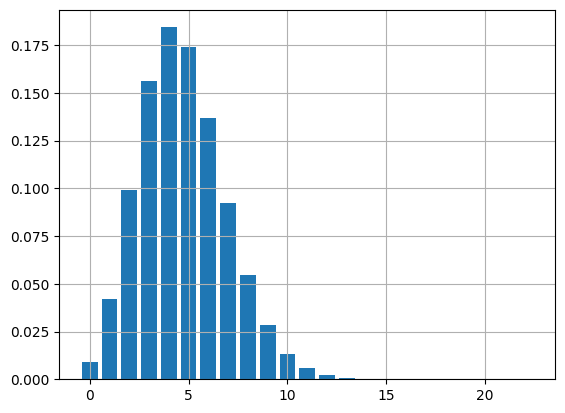

In [342]:
x = np.arange(0, Kmax, 1)
plt.bar(x, distribution_zeta[3])
plt.grid()

In [343]:
distribution_k_zeta = np.zeros((N_max, Kmax * N_max))
for i in range(1, N_max + 1):
    nu = mean_rv_zeta(i)
    for j in range(Kmax):
        distribution_k_zeta[i - 1, i * j] =  np.exp(-nu) * (nu ** j) / sp.special.factorial(j)

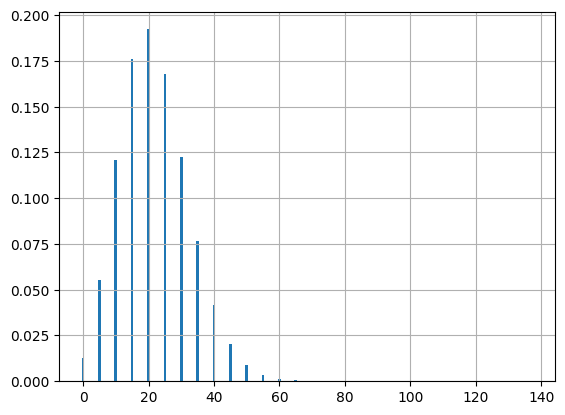

In [344]:
x = np.arange(0, Kmax * N_max, 1)
plt.bar(x, distribution_k_zeta[4])
plt.grid()

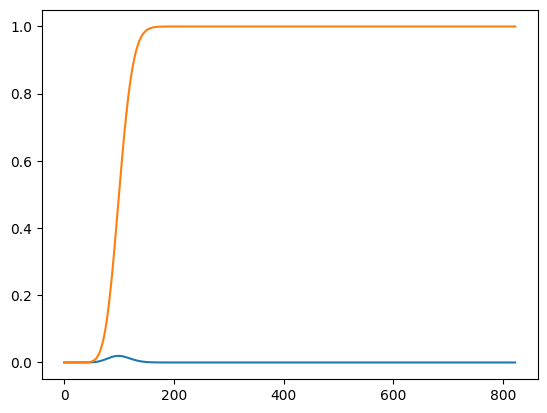

In [367]:
F = distribution_k_zeta[0]

for i in range(1, N_max):
    F = np.convolve(F, distribution_k_zeta[i])


plt.plot(F)
plt.plot(np.cumsum(F))
plt.show()

In [368]:
po = np.cumsum(F)
S = po[po < 0.99]

In [369]:
len(S)

152